Для початку встановимо бібліотеку, яка потрібна для роботи з Excel файлами з pandas. Можна встановити тут, або в терміналі, але якщо Ви встановлюєте в терміналі, то після того треба перезапустити ядро (Kernel) ноутбуку, аби бібліотека точно підтягнулась. Іноді підтягується і без того, але це на випадок, що робити, якщо компілятор каже, що її не бачить.

In [1]:
!pip install openpyxl

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

Ось так можемо переглянути, які є листки в Excel файлі:

In [3]:
# замініть на шлях до файлу на своєму комп`ютері
path_to_file = '../data/Grocery Database.xlsx'

In [4]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

А так можемо зчитати конкретний листок:

In [5]:
descr = xl.parse('Fact Summary')

Читати дані можна і з Pandas, але тут немає можливості переглянути наявні листки, а також довше відбувається читання даних.

In [6]:
df = pd.read_excel(path_to_file)

# Початковий аналіз даних

1.Виведемо перші 3 записи з набору даних, типи даних в наборі даних df та розміри набору даних:

In [7]:
display(df.head(3), df.dtypes, df.shape)

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693


Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

(50447, 32)

2.Перевіримо, чи є в цьому наборі даних пропущені значення:

In [8]:
df.isna().sum()

Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64

3.Перевіримо чи сумарна вартість товарів в чеку дорівнює сумі, вказаній для чеку в окремій колонці. Візьмемо такий рахунок з номером "GIJ00008", де більше однієї позиції, а також кількість деяких позицій > 1:

In [9]:
df[df['Receipt Number'] == 'GIJ00008']['Net Bill Amount'].unique()

array([123.0096])

In [10]:
df[df['Receipt Number'] == 'GIJ00008'].Amount.sum()

123.0096

4.Виведемо список країн та міст для подальшого дослідження:

In [11]:
display(df.Country.unique(), df.City.unique())

array(['Indonesia', 'Malaysia', 'Philippines', 'Singapore'], dtype=object)

array(['Jakarta', 'Kuala Lumpur', 'Manila', 'Bedok', 'Woodlands'],
      dtype=object)

# Аналіз даних

**Питання 1**
Розглянути міста та іх прибуток у кожному році.

In [12]:
city_pivot = df.pivot_table(index = 'Year', columns = 'City', values = 'Profit Margin', aggfunc = 'sum')
round(city_pivot, 1)

City,Bedok,Jakarta,Kuala Lumpur,Manila,Woodlands
Year,,,,,
2016,3158.3,2395.6,2558.1,2621.0,1588.1
2017,3347.2,2600.1,2863.7,3221.4,1686.9
2018,3773.2,2812.8,3400.3,3852.6,1951.4
2019,4371.0,3260.1,4136.0,4760.6,2263.0


Бачимо, що в кожному місті дохід зростає з кожним роком відповідно. Одразу бачимо, що міста Bedok та Manila лідують.

**Питання 2**
Побудувати графік, щоб дослідити наглядно, який прибуток приносять міста.

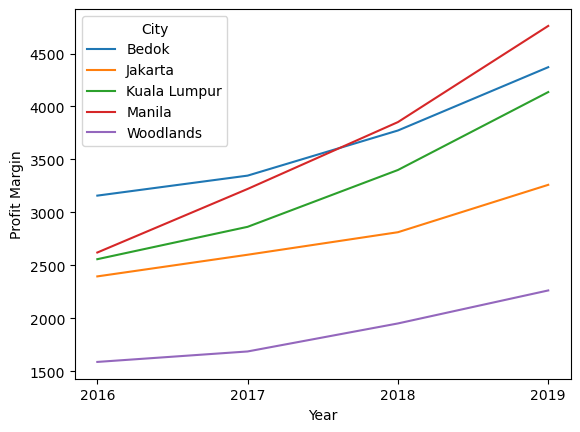

In [13]:
city_pivot.plot(xticks = city_pivot.index, ylabel = 'Profit Margin');

Міста Bedok та Manila лідують. Кореляція для кожного з міст - позитвна.

**Питання 3**
Порахуємо загальну суму доходу з кожної країни.

In [14]:
round(df.groupby(['City'])['Profit Margin'].sum().sort_values(ascending = False).reset_index(), 2)

,City,Profit Margin
0,Bedok,14649.60
1,Manila,14455.63
2,Kuala Lumpur,12958.12
3,Jakarta,11068.60
4,Woodlands,7489.30


Бачимо, що найприбутковіші міста за загальною сумою - Бєдок та Маніла.

**Питання 4**
Порахуємо загальну суму доходу з кожного міста по місяцях.

In [15]:
month_pivot = df.pivot_table(index = 'Month', columns = 'City', values = 'Profit Margin', aggfunc = 'sum')
round(month_pivot, 2)

City,Bedok,Jakarta,Kuala Lumpur,Manila,Woodlands
Month,,,,,
1,1603.09,806.98,983.83,1154.33,717.86
2,1093.33,880.36,1102.20,1111.22,446.72
3,1183.87,956.61,1045.13,1257.46,528.83
4,1107.51,803.06,1000.02,1113.75,550.86
5,1076.32,994.97,1084.25,1115.44,791.26
6,1247.40,866.11,1067.98,1068.72,587.81
7,1370.07,870.74,1119.98,1207.20,649.94
8,1185.12,759.93,1094.37,1113.46,649.63
9,1015.56,1014.22,1027.56,1169.01,516.77


Чіткої тенденції - немає, трохи виділяється грудень (причиною може бути Різдво).

**Питання 5**
Подивимося на чеки кожного місяця, щоб визначити чи впливає сезон.

In [16]:
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

bill_by_month = df.groupby('Month')['Gross Bill Amount'].sum().reset_index()
bill_by_month['Month'] = bill_by_month['Month'].map(month_map)

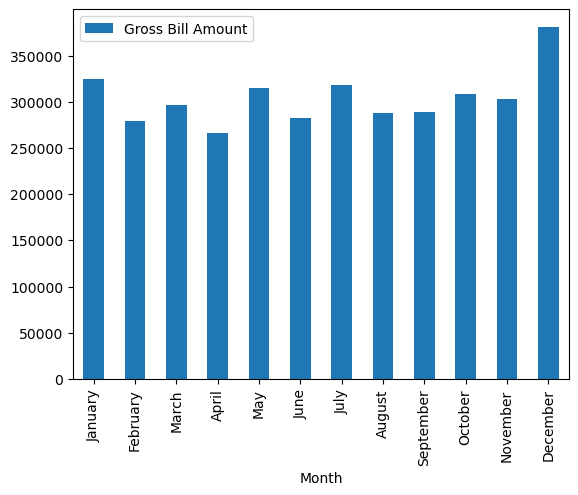

In [17]:
bill_by_month.set_index('Month').plot.bar();

Чіткої тенденції ми не бачимо, можу виділити тільки грудень - скоріше за все це пов'язано з Різдвом та Новим роком.

**Питання 6**
Яка є кількість унікальних клієнтів?

In [18]:
customers = df['Membership ID'].nunique()
print('Кількість унікальних клієнтів:', customers)

Кількість унікальних клієнтів: 2601


**Питання 7**
Подивимося, яка стать переважає при здійсненню покупок.

In [19]:
df.Gender.value_counts().reset_index()

,Gender,count
0,Female,41822
1,Male,8625


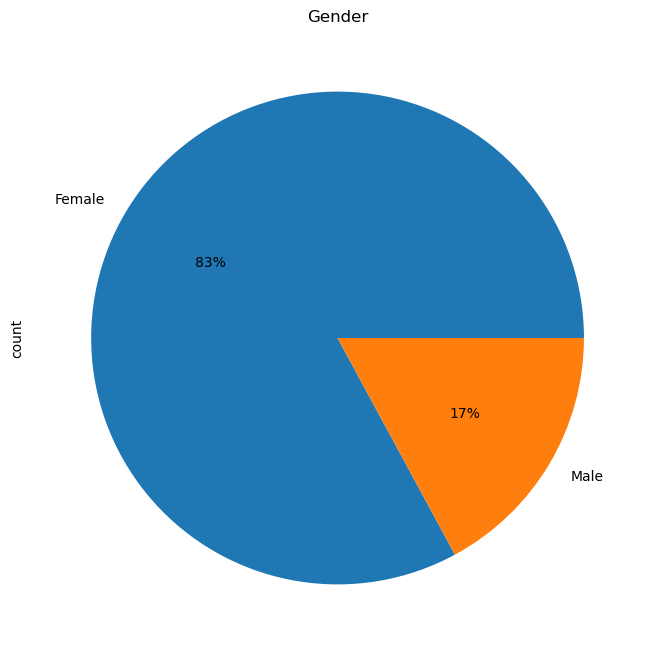

In [20]:
df.Gender.value_counts().plot(kind = 'pie', y = 'Gender', autopct = '%1.0f%%', figsize = (8, 8))
plt.title('Gender');

Бачимо, що кількість жінок суттєво переважає.

**Питання 8**
Подивимося, який вік жінок найплатоспроможніший.

In [21]:
female_sorted = df[df['Gender'] == 'Female'].groupby('Age')['Gross Bill Amount'].sum()

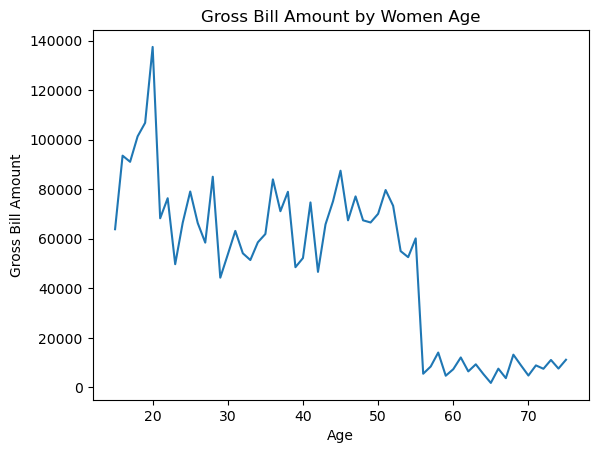

In [22]:
female_sorted.plot( )
plt.ylabel('Gross Bill Amount') 
plt.title('Gross Bill Amount by Women Age') 
plt.show();

Бачимо на графіку, що сума чеків середньої вікової категорії набагато вищі за старшу категорію.

**Питання 9** Згрупуємо жінок по групам та подивимося, скільки прибутку приносить кожнна категорія та як він відрізняється.

In [23]:
# створимо 3 вікові групи
bins = [0, 25, 55, 100]
labels = ['young', 'adult', 'old']
df['Age_bin'] = pd.cut(df['Age'], bins, labels = labels)

In [24]:
# внесемо для зручності та логічній послідовності нову колонку Age_bin одразу після Age 
df = df[['Receipt Number', 'Date', 'Year', 'Month', 'Time', 'Mobile Number',
       'Membership ID', 'Loyalty Card Points', 'Age', 'Age_bin', 'Gender', 'City',
       'Country', 'Category', 'Sub_Category', 'Items', 'Brand ',
       'Description ', 'Price', 'QTY', 'DISC', 'Amount', 'Net Bill Amount',
       'GST', 'Gross Bill Amount', 'Payment Mode', 'Bank Name',
       '% Profit Margin', '% Operating Cost', '% Product Cost',
       'Profit Margin', 'Operating Cost', 'Product Cost']]

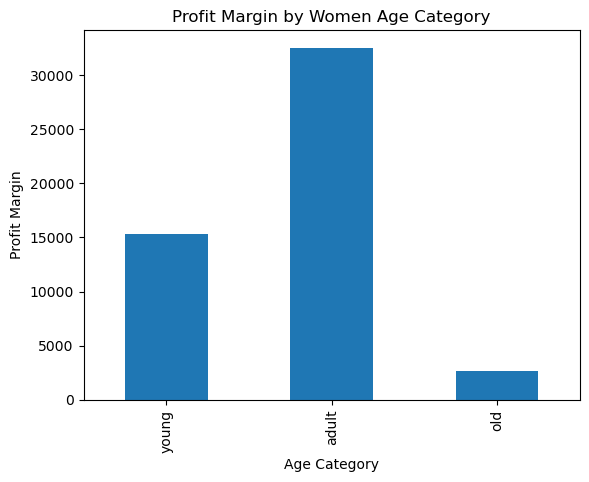

In [25]:
df[df['Gender'] == 'Female'].groupby('Age_bin')['Profit Margin'].sum().plot.bar()
plt.ylabel('Profit Margin')
plt.xlabel('Age Category') 
plt.title('Profit Margin by Women Age Category') 
plt.show();

Наглядно бачимо, що найбільший прибуток приносять жінки категорії 25-55 років. Тобто це наша цільова аудиторія, цікаво було б проаналізувати також категорії, які лідують у цій віковій групи та націлити рекламну кампанію.
З іншої сторони - цікаво дослідити категорію оld, щоб зрозуміти як можна покращити прибуток з цієї категорії, можливо треба додати нові товари, які б привабили цю категорію.

**Питання 10**
Подивимося, який спосіб оплати використовують клієнти.

In [26]:
df['Payment Mode'].value_counts().reset_index()

,Payment Mode,count
0,Card,17149
1,Wallet,16867
2,Cash,16431


**Питання 11**
Які каткгорії товарів є найбільш популярними в магазині?

In [27]:
df.Category.value_counts()[:10]

Category
Bakery & Breakfast           6770
Frozen                       6393
Beauty                       5205
Fruit & Vegetable            4370
Pet Care                     3465
Dairy, Chilled & Eggs        3381
Choco, Snacks, Sweets        3019
Kitchen & Dining             2552
Rice & Cooking Essentials    2432
Beverages                    2208
Name: count, dtype: int64

Бачимо, що лідує категорія Bakery & Breakfast та Frozen.

**Питання 12**
Дослідимо, підкатегорію у найпопулярнішій категорії Bakery & Breakfast.

In [28]:
df[df.Category == 'Bakery & Breakfast']['Sub_Category'].value_counts(ascending = False)

Sub_Category
Fresh Bread              1608
Sliced Bread             1066
Pastries & Treats        1048
Oatmeals                 1030
Cereal & Protein Bars    1015
Jams, Honey & Spreads    1003
Name: count, dtype: int64

**Питання 13** Знайдіть товар, який був куплений у найбільшій кількості в датафреймі у найпопулярнішій категорії Bakery & Breakfast.

In [29]:
df[df.Category == 'Bakery & Breakfast'].groupby('Items')['QTY'].sum().sort_values(ascending = False)[:1]

Items
Original wholemeal bread    957
Name: QTY, dtype: int64

**Питання 14** Проведемо z-test, щоб зрозуміти чи відрізняється прибуток з двох підкатегорій Sliced Bread та Pastries & Treats.

In [30]:
sliced_bread = df[df.Sub_Category == 'Sliced Bread'].pivot_table(index = 'Receipt Number', values = 'Profit Margin', aggfunc = 'sum').values

In [31]:
pastries_treats = df[df.Sub_Category == 'Pastries & Treats'].pivot_table(index = 'Receipt Number', values = 'Profit Margin', aggfunc = 'sum').values

In [32]:
#Нульоваа гіпотеза H0 - прибуток з підкатегорії sliced_bread та підкатегорії pastries_treats - однаковий.
#Альтернативна гіпотеза - прибуток відрізняється.
from statsmodels.stats.weightstats import ztest
alpha = 0.05
stat, p_value = ztest(sliced_bread, pastries_treats, value = 0)
print("Z-test")
print("Статистика тесту:", stat)
print("p-значення:", p_value)

Z-test
Статистика тесту: [14.15501517]
p-значення: [1.73900213e-45]


In [33]:
if p_value > alpha:
    print("За результатами Z-test ми не можемо відхилити H0.")
else:
    print("За результатами Z-test відхиляємо H0.")

За результатами Z-test відхиляємо H0.


Задаємо рівень стат. значущості як 5%. Статистика для двох вибірок z-критерію становить 14.155, а відповідне p-value дорівнює 1.73900213e-45. Оскільки p-value < 0.05, то ми відхиляємо нульову гіпотезу. Іншими словами, прибуток відрізняється.

In [34]:
print(f'Прибуток з підкатегорії sliced_bread - {{:.2f}}.\nПрибуток з підкатегорії pastries_treats - {{:.2f}}.'.format(sliced_bread.sum(), pastries_treats.sum()))

Прибуток з підкатегорії sliced_bread - 1237.28.
Прибуток з підкатегорії pastries_treats - 801.47.


**Cистемa метрик/Tableau репорт**

Нас цікавить дохід(маржа), який компанія отримує з країни/міста. Дослідимо тенденцію прибутку по роках, подивимося на кореляцію. Цікаво буде порахувати, який відсоток доходу формує кожне окреме місто. Також цікаво подивитися в порівнянні країни, щоб зрозуміти, де відкривати наступні філіали, також проаналізуємо, які категорії краще розвивати по яким містам, які з них є найприбутковішими і навпаки.

Систему метрик можна знайти за посиланням:
https://docs.google.com/document/d/1mhuNltPZb8mX3o5qjSwfeZtX0ghg9bHTeLcq3zUDQxg/edit?usp=sharing

Візуалізацію у вигляді інтерактивного репорту даних можна знайти за посиланням:
https://public.tableau.com/app/profile/maryna.danets/viz/ProfitMargin_17212539303290/ProfitMargin